In [4]:
print('let us start ')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

let us start 


In [5]:
S0 = 100
T = 1.0
R_min = 0.0
R_max = 3.0
M = 200  
N = 200  

In [10]:
dR = (R_max - R_min) / M
dt = T / N
R = np.linspace(R_min, R_max, M + 1)
t = np.linspace(0, T, N + 1)
H_final = np.maximum(1 - R, 0)
def thomas_algorithm(a, b, c, d):
    nf = len(d)
    ac, bc, cc, dc = map(np.copy, (a, b, c, d))
    for it in range(1, nf):
        mc = ac[it] / bc[it - 1]
        bc[it] = bc[it] - mc * cc[it - 1]
        dc[it] = dc[it] - mc * dc[it - 1]

    xc = np.zeros(nf)
    xc[-1] = dc[-1] / bc[-1]

    for il in range(nf - 2, -1, -1):
        xc[il] = (dc[il] - cc[il] * xc[il + 1]) / bc[il]

    return xc

In [11]:
def crank_nicolson(H_T, r, sigma):
    H = H_T.copy()
    for n in reversed(range(N)):
        A = np.zeros(M+1)
        B = np.zeros(M+1)
        C = np.zeros(M+1)
        D = np.zeros(M+1)
        alpha = 0.25 * dt * sigma**2 * R**2 / dR**2
        beta = 0.25 * dt * (1 - r * R) / dR

        for i in range(1, M):
            A[i] = -alpha[i] + beta[i]
            B[i] = 1 + 2*alpha[i]
            C[i] = -alpha[i] - beta[i]
            D[i] = alpha[i]*H[i-1] + (1 - 2*alpha[i])*H[i] + alpha[i]*H[i+1] \
                   + beta[i]*(H[i+1] - H[i-1])
        B[0] = 1.0
        C[0] = 0.0
        D[0] = 1.0 
        A[M] = 0.0
        B[M] = 1.0
        D[M] = 0.0  
        H = thomas_algorithm(A, B, C, D)
    return H


European Asian Call Option Prices (Arithmetic Average Strike):
           sigma=0.1  sigma=0.2  sigma=0.3
r=0.05 -1.244358e-15   0.000006   0.008668
r=0.09 -1.795682e-16   0.000016   0.013493
r=0.15 -6.256488e-18   0.000066   0.025475


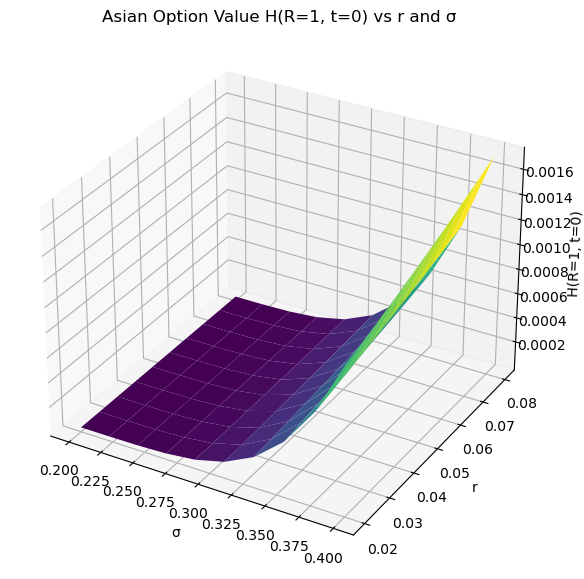

In [12]:
r_vals = [0.05, 0.09, 0.15]
sigma_vals = [0.1, 0.2, 0.3]
results = []

for r in r_vals:
    row = []
    for sigma in sigma_vals:
        H0 = crank_nicolson(H_final, r, sigma)
        R0 = 1.0
        idx = np.searchsorted(R, R0)
        price = S0 * H0[idx]
        row.append(price)
    results.append(row)
df = pd.DataFrame(results, index=[f"r={r}" for r in r_vals], columns=[f"sigma={s}" for s in sigma_vals])
print("European Asian Call Option Prices (Arithmetic Average Strike):")
print(df)
from mpl_toolkits.mplot3d import Axes3D

r_grid = np.linspace(0.02, 0.08, 10)
sigma_grid = np.linspace(0.2, 0.4, 10)
R0 = 1.0
Z = np.zeros((len(r_grid), len(sigma_grid)))

for i, r in enumerate(r_grid):
    for j, sigma in enumerate(sigma_grid):
        H0 = crank_nicolson(H_final, r, sigma)
        idx = np.searchsorted(R, R0)
        Z[i, j] = H0[idx]

R_grid, Sigma_grid = np.meshgrid(sigma_grid, r_grid)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(R_grid, Sigma_grid, Z, cmap='viridis')
ax.set_xlabel('σ')
ax.set_ylabel('r')
ax.set_zlabel('H(R=1, t=0)')
ax.set_title('Asian Option Value H(R=1, t=0) vs r and σ')
plt.show()
